# 1- Veri Seti Tanımı

In [74]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
data = pd.read_csv('water-treatment.data')
import warnings
warnings.filterwarnings('ignore')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [75]:
data = data.drop(['1'], axis=1)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [76]:
print("Örnek Sayısı:",len(data))
print("Öznitelik Sayısı:",len(data.columns))
data.shape

Örnek Sayısı: 527
Öznitelik Sayısı: 38


(527, 38)

In [77]:
print('Öznitelik türleri:\n', data.dtypes)

Öznitelik türleri:
 2      object
3      object
4     float64
5      object
6      object
7      object
8      object
9      object
10      int64
11    float64
12     object
13      int64
14     object
15     object
16      int64
17    float64
18     object
19     object
20     object
21     object
22     object
23      int64
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
dtype: object


# 2- Verinin ön işlenmesi

In [78]:
def isnumberFloat(x):
    try:
        float(x) 
        return x
    except:
        return np.nan

In [79]:
data = data.applymap(lambda x: isnumberFloat(x))
data = data.apply(pd.to_numeric)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [80]:
data.isnull().sum()/len(data)*100

2      3.415560
3      0.569260
4      0.000000
5      4.364326
6      1.138520
7      0.189753
8      2.087287
9      4.743833
10     0.000000
11     0.000000
12     7.590133
13     0.000000
14     2.087287
15     4.554080
16     0.000000
17     0.000000
18     5.313093
19     1.707780
20     0.379507
21     2.466793
22     4.743833
23     0.000000
24     0.189753
25     4.364326
26     3.415560
27     0.948767
28     3.225806
29     5.313093
30     0.189753
31    11.764706
32     0.759013
33     5.123340
34     7.590133
35     4.933586
36     6.831120
37     4.743833
38     1.518027
39     5.882353
dtype: float64

## Handle with Missing Values

In [81]:
data.mode()
mostFrequent = data.mode().loc[0]
temp = data.fillna(mostFrequent)
temp.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5


In [82]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='most_frequent').fit(data)
data = pd.DataFrame(imputer.transform(data))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5


In [83]:
print("Veri ile ilgili istatistiksel bilgiler:")
data.describe()

Veri ile ilgili istatistiksel bilgiler:


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,36960.886148,2.351328,7.810057,186.282732,406.592030,227.339658,61.503985,4.589374,1478.620493,7.829981,...,1494.635674,38.828653,58.454080,90.694877,83.603795,68.107590,89.101518,78.072106,89.006452,99.140038
std,6673.033177,2.743567,0.246175,61.750924,119.708608,135.832780,12.308208,2.678019,394.898019,0.226925,...,387.559729,13.911690,12.775228,8.733228,8.480339,11.398403,6.790672,8.728821,8.166234,4.329180
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32557.500000,0.900000,7.600000,139.500000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.450000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.400000
50%,35729.000000,1.500000,7.800000,179.000000,397.000000,196.000000,64.500000,4.500000,1406.000000,7.800000,...,1431.000000,36.900000,59.300000,93.300000,85.500000,70.400000,90.300000,79.500000,90.800000,99.800000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [84]:
print('Değişmiş haliyle Öznitelik türleri:\n', data.dtypes)

Değişmiş haliyle Öznitelik türleri:
 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
dtype: object


## Outlier Detection

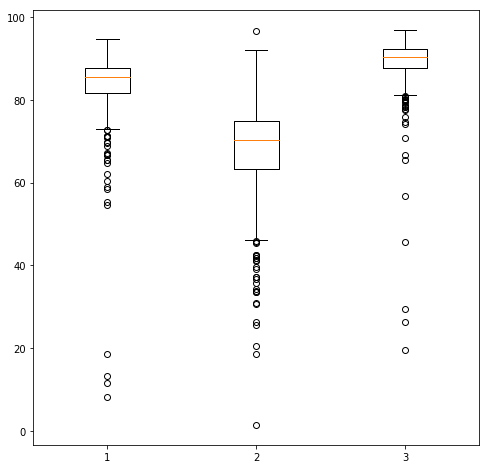

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=[8,8])
plt.boxplot([data[32],data[33], data[34]])
plt.show()

In [86]:
Q1 = data.quantile(0.25)
print('Q1:\n', Q1)
Q3 = data.quantile(0.75)
print('Q3:\n', Q3)
IQR = Q3 - Q1
print('IQR:\n',IQR)

Q1:
 0     32557.50
1         0.90
2         7.60
3       139.50
4       326.50
5       170.00
6        55.85
7         3.20
8      1201.00
9         7.70
10      140.00
11      184.00
12       54.20
13        3.00
14     1217.00
15        7.70
16       98.00
17      221.50
18       78.00
19       66.70
20        0.20
21     1225.50
22        7.60
23       14.00
24       65.00
25       14.00
26       75.15
27        0.00
28     1235.00
29       31.15
30       50.45
31       88.90
32       81.80
33       63.40
34       87.80
35       74.25
36       87.70
37       99.40
Name: 0.25, dtype: float64
Q3:
 0     41094.00
1         3.00
2         8.00
3       222.00
4       474.50
5       242.00
6        69.60
7         5.50
8      1672.00
9         8.00
10      238.50
11      272.00
12       68.80
13        6.00
14     1713.50
15        7.90
16      147.00
17      325.00
18      106.00
19       79.35
20        0.50
21     1701.00
22        7.80
23       22.00
24      100.00
25       24.00
26 

In [87]:
#outlier detecion with IQR 
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644.0,7.8,...,1764.0,36.9,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,41115.0,6.0,7.8,133.0,552.0,262.0,64.1,5.0,1603.0,7.8,...,1703.0,36.9,61.9,93.8,89.1,79.8,90.3,86.2,90.1,99.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249.0,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4


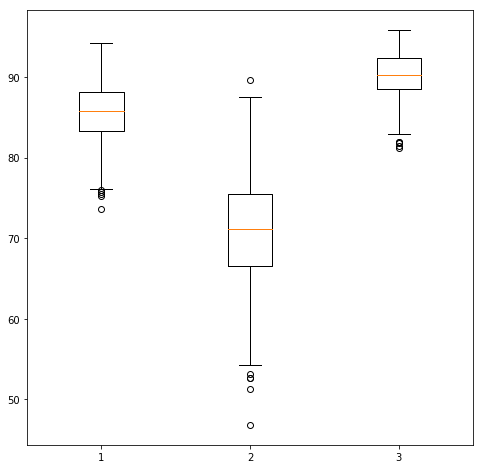

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=[8,8])
plt.boxplot([data[32],data[33], data[34]])
plt.show()

## Kolonlar arasında bir ilişki var mı? (Feature Selection)

In [89]:
import seaborn as sns
correlations = data.corr()

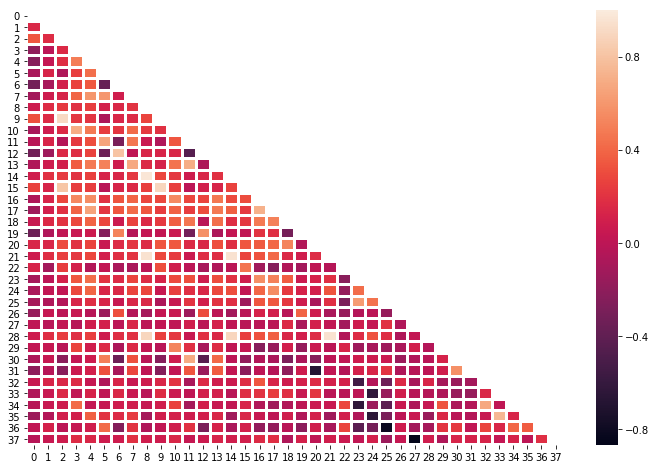

In [90]:
plt.subplots(figsize=(12,8))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, xticklabels=data.columns, yticklabels=data.columns, mask=mask, linewidths=2)
plt.show()

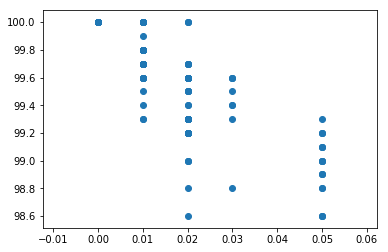

In [91]:
plt.scatter(data[27], data[37])

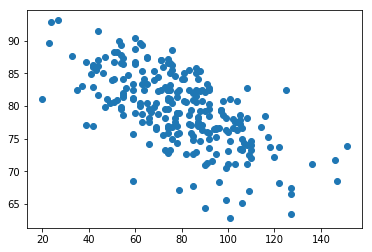

In [92]:
plt.scatter(data[24], data[35])

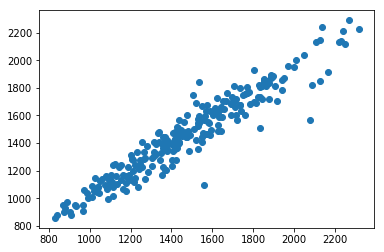

In [93]:
plt.scatter(data[21], data[28])

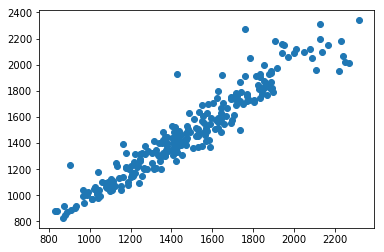

In [94]:
plt.scatter(data[21], data[14])

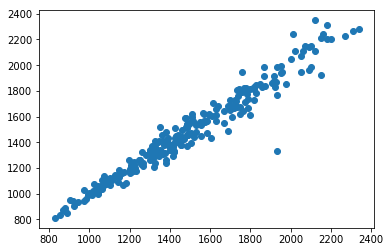

In [95]:
plt.scatter(data[14], data[8])

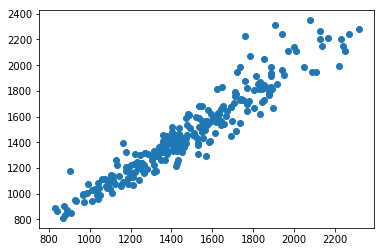

In [96]:
plt.scatter(data[21], data[8])

In [97]:
#birbiriyle ilişkli olan kolonlardan bir tanesi silinir.
data = data.drop([24,21,28,14], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,0.02,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,0.02,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644.0,7.8,...,0.00,36.9,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,41115.0,6.0,7.8,133.0,552.0,262.0,64.1,5.0,1603.0,7.8,...,0.05,36.9,61.9,93.8,89.1,79.8,90.3,86.2,90.1,99.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249.0,7.7,...,0.03,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4


## Feature Extraction

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit(data).transform(data)
pca = PCA(n_components=2)
pca.fit(X_normalized)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
data_2d = pca.transform(X_normalized)

In [100]:
data.index

Int64Index([  0,   4,   5,   6,   8,  19,  21,  22,  23,  24,
            ...
            515, 516, 517, 518, 519, 520, 523, 524, 525, 526],
           dtype='int64', length=255)

In [101]:
data_2d = pd.DataFrame(data_2d)
data_2d.index = data.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

,PC1,PC2
0,0.035940,0.045315
4,0.981939,-0.790905
5,2.256443,-0.676873
6,3.624268,-1.535921
8,0.179718,-0.185143


# K - Means

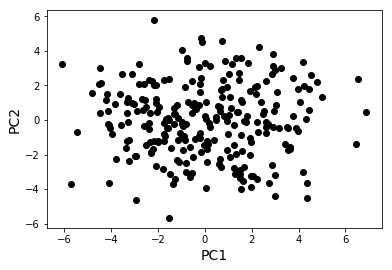

In [117]:
import pylab as pl
pl.scatter(data_2d.iloc[:,0],data_2d.iloc[:,1],c='black')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
pl.show()

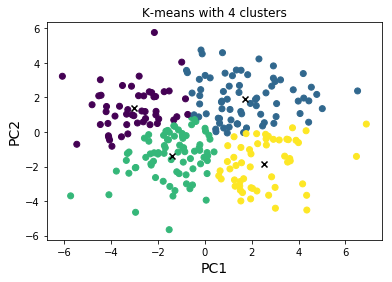

In [122]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import pylab as pl
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_2d)
centers = pd.DataFrame(kmeans.cluster_centers_)

pl.figure()
pl.title('K-means with 4 clusters')
pl.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans.labels_)
plt.scatter(centers[0], centers[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.show()


In [123]:
print('silhoutte score: ', silhouette_score(data_2d, kmeans.labels_))
print('inertia :' , kmeans.inertia_)

silhoutte score:  0.3407160264839394
inertia : 872.8914813788542


In [124]:
kmeans.score(data_2d)

-872.8914813788543

In [125]:
#farklı iter sayıları ile algoritmanın gösterimi
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(data_2d)
kmeans_iter2.fit(data_2d)
kmeans_iter3.fit(data_2d)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=4,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

In [149]:
centers3 = pd.DataFrame(kmeans_iter3.cluster_centers_)
centers2 = pd.DataFrame(kmeans_iter2.cluster_centers_)
centers1 = pd.DataFrame(kmeans_iter1.cluster_centers_)

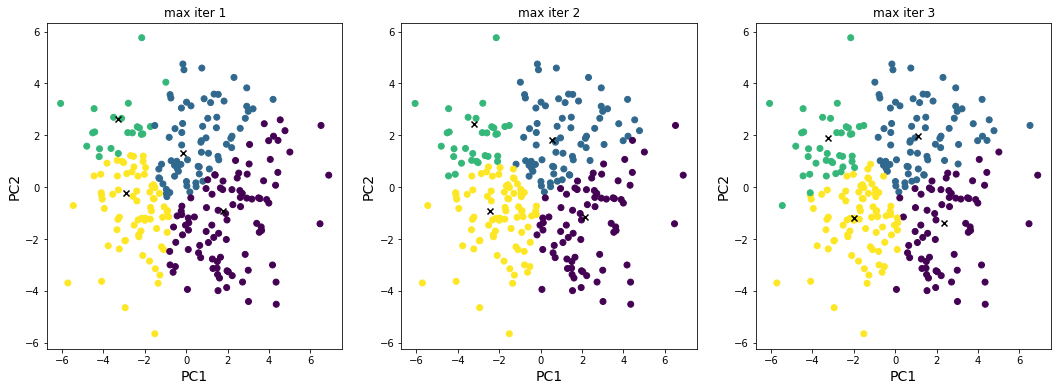

In [150]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(1,3)

plt.figure(figsize=(18, 6))

plt.subplot(gs[0, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter1.labels_)
plt.scatter(centers1[0], centers1[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('max iter 1')

plt.subplot(gs[0, 1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter2.labels_)
plt.scatter(centers2[0], centers2[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('max iter 2')

plt.subplot(gs[0, 2])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter3.labels_)
plt.scatter(centers3[0], centers3[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('max iter 3')

plt.show()

In [154]:
#farklı random state ile
kmeans_rnd_state1 = KMeans(n_clusters=4, init="random", n_init=1,algorithm="full", random_state=12)
kmeans_rnd_state2 = KMeans(n_clusters=4, init="random", n_init=1,algorithm="full", random_state=24)
kmeans_rnd_state3 = KMeans(n_clusters=4, init="random", n_init=1,algorithm="full", random_state=36)

kmeans_rnd_state1.fit(data_2d)
kmeans_rnd_state2.fit(data_2d)
kmeans_rnd_state3.fit(data_2d)

centers33 = pd.DataFrame(kmeans_rnd_state3.cluster_centers_)
centers22 = pd.DataFrame(kmeans_rnd_state2.cluster_centers_)
centers11 = pd.DataFrame(kmeans_rnd_state1.cluster_centers_)

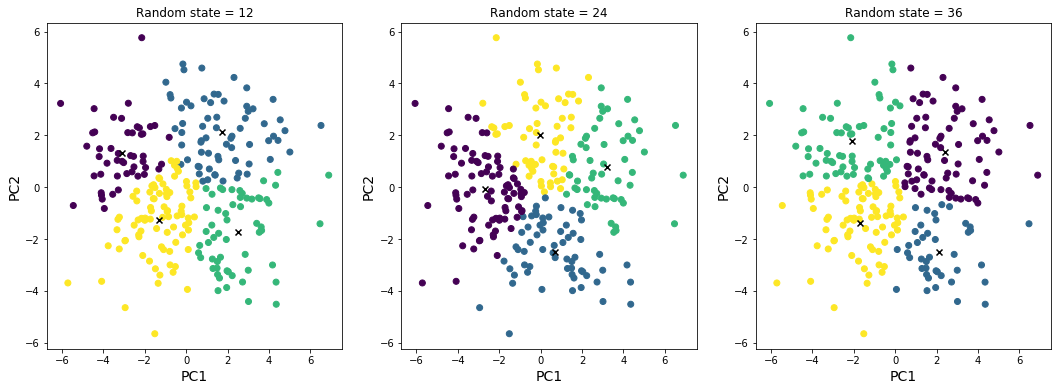

In [155]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(1,3)

plt.figure(figsize=(18, 6))

plt.subplot(gs[0, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_rnd_state1.labels_)
plt.scatter(centers11[0], centers11[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Random state = 12')

plt.subplot(gs[0, 1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_rnd_state2.labels_)
plt.scatter(centers22[0], centers22[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Random state = 24')

plt.subplot(gs[0, 2])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_rnd_state3.labels_)
plt.scatter(centers33[0], centers33[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Random state = 36')


plt.show()

In [158]:
#cluster sayısını değiştirirsek ne olur?
kmeans_k3 = KMeans(n_clusters=3, init="random",random_state=42)
kmeans_k6 = KMeans(n_clusters=6, init="random",random_state=42)

kmeans_k3.fit(data_2d)
kmeans_k6.fit(data_2d)

centersc_3 = pd.DataFrame(kmeans_k3.cluster_centers_)
centersc_6 = pd.DataFrame(kmeans_k6.cluster_centers_)

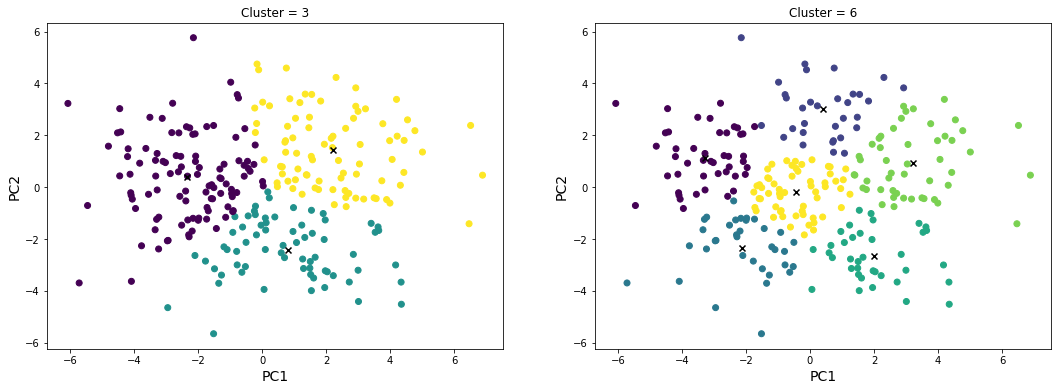

In [161]:
gs = GridSpec(1,2)

plt.figure(figsize=(18, 6))

plt.subplot(gs[0, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_k3.labels_)
plt.scatter(centersc_3[0], centersc_3[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Cluster = 3')

plt.subplot(gs[0, 1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_k6.labels_)
plt.scatter(centersc_6[0], centersc_6[1], c='black',  marker='x')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Cluster = 6')

plt.show()

In [164]:
kmeans_k3.inertia_

1120.3783491193155

In [165]:
kmeans_k6.inertia_

564.0092983814114

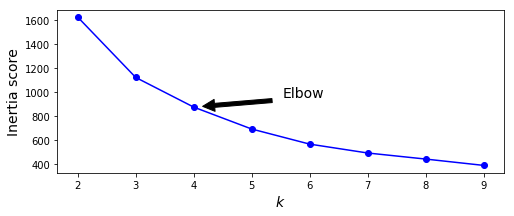

In [172]:
#inertia score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_2d) for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia score", fontsize=14)
plt.annotate('Elbow',xy=(4, inertias[2]), xytext=(0.55, 0.55),textcoords='figure fraction', fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

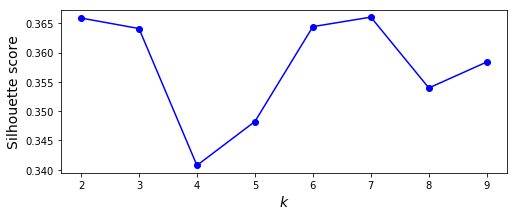

In [138]:
#silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_2d)
                for k in range(2, 10)]
silhouette_scores = [silhouette_score(data_2d, model.labels_)for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# Agglomerative Clustering

In [103]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
agg = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=4)
agg.fit(data_2d)

silhouette_score(data_2d, agg.labels_)

0.22281716576697588

In [104]:
agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       1, 3, 3, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 3, 0, 0, 0, 0, 2,
       3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 3, 3, 2, 1, 3, 1, 1, 3, 0, 0, 0, 1,
       0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 3, 2, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 3, 2, 2, 3, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2], dtype=int64)

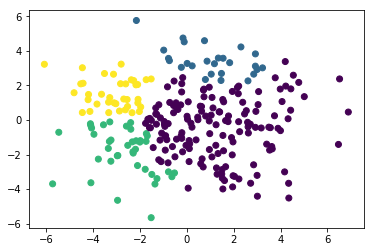

In [105]:
plt.scatter(data_2d.iloc[:,0],data_2d.iloc[:,1],c=agg.labels_)

In [186]:
#cluster sayısını değiştirirsek ne olur?
agg_k3 = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=3)
agg_k6 = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=6)

agg_k3.fit(data_2d)
agg_k6.fit(data_2d)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=6, pooling_func='deprecated')

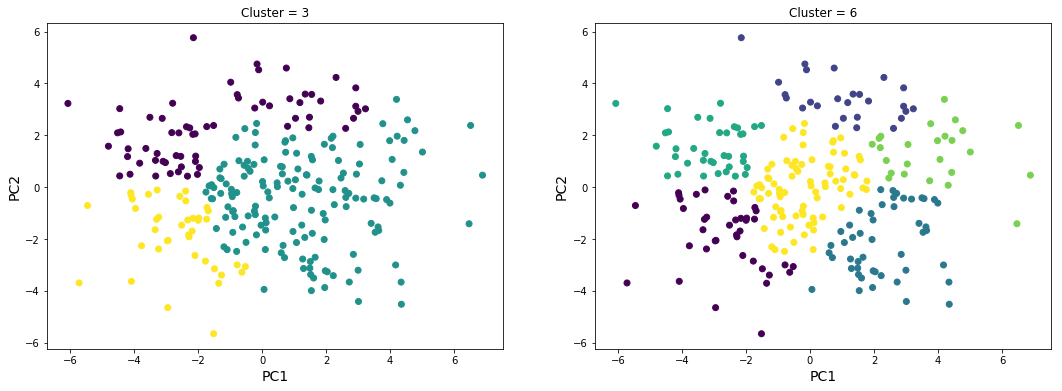

In [187]:
gs = GridSpec(1,2)

plt.figure(figsize=(18, 6))

plt.subplot(gs[0, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_k3.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Cluster = 3')

plt.subplot(gs[0, 1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_k6.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Cluster = 6')

plt.show()

### Dendogram Graph

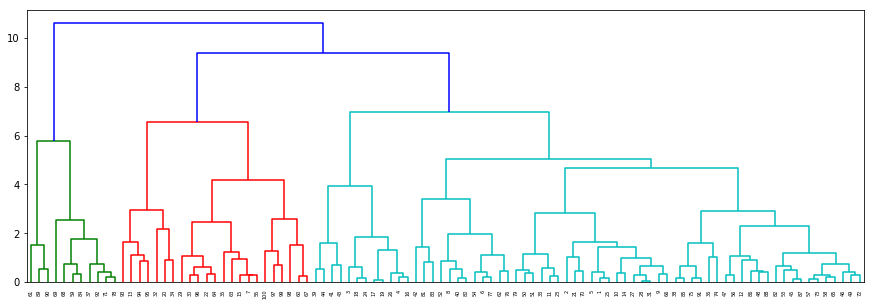

In [188]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(data_2d[:100], 'complete')

labelList = range(1, 101)

plt.figure(figsize=(15, 5))  
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show() 

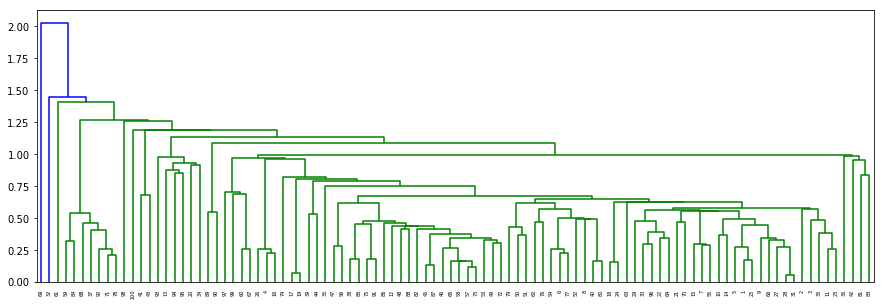

In [189]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(data_2d[:100], 'single')

labelList = range(1, 101)

plt.figure(figsize=(15, 5))  
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

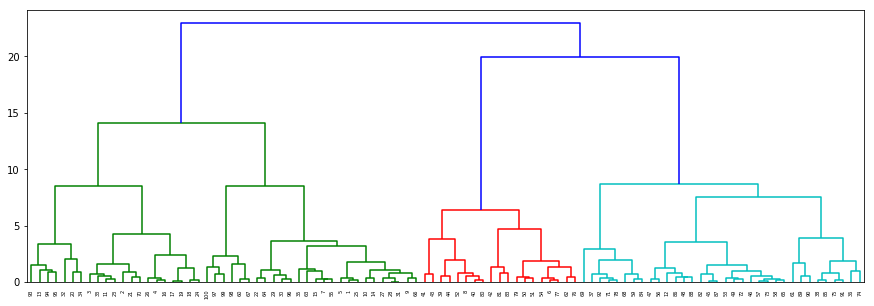

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(data_2d[:100], 'ward')

labelList = range(1, 101)

plt.figure(figsize=(15, 5))  
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

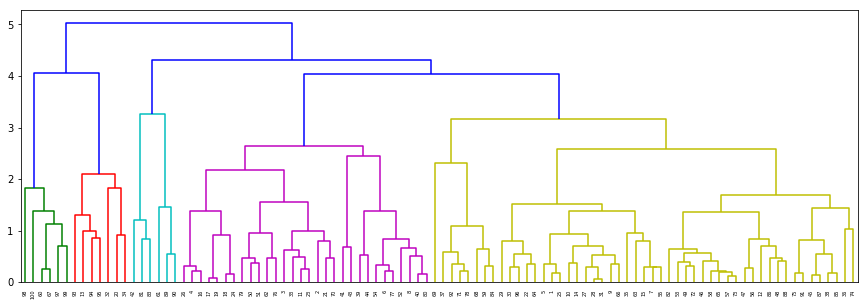

In [192]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(data_2d[:100], 'average')

labelList = range(1, 101)

plt.figure(figsize=(15, 5))  
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

### Silhoutte Scores

In [107]:
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(data_2d) for k in range(1, 10)]

In [108]:
silhouette_scores = [silhouette_score(data_2d, model.labels_)
                     for model in agglo_per_k[1:]]

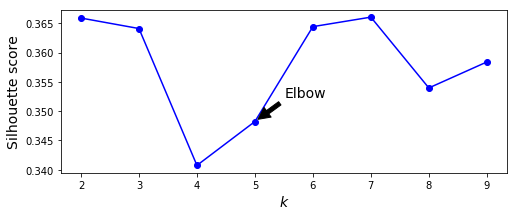

In [194]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Elbow',xy=(5, silhouette_scores[3]), xytext=(0.55, 0.55),textcoords='figure fraction', fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

In [195]:
agg_k5 = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=5)
agg_k5.fit(data_2d)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

Text(0.5, 1.0, 'Cluster = 5')

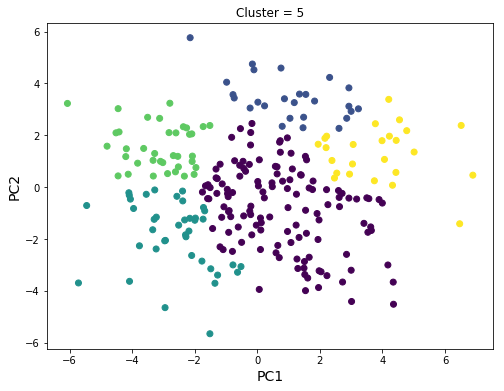

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_k5.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('Cluster = 5')

In [211]:
agg_1 = AgglomerativeClustering(linkage="single", affinity='euclidean', n_clusters=5)
agg_2 = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=5)
agg_3 = AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=5)

agg_1.fit(data_2d)
agg_2.fit(data_2d)
agg_3.fit(data_2d)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=5, pooling_func='deprecated')

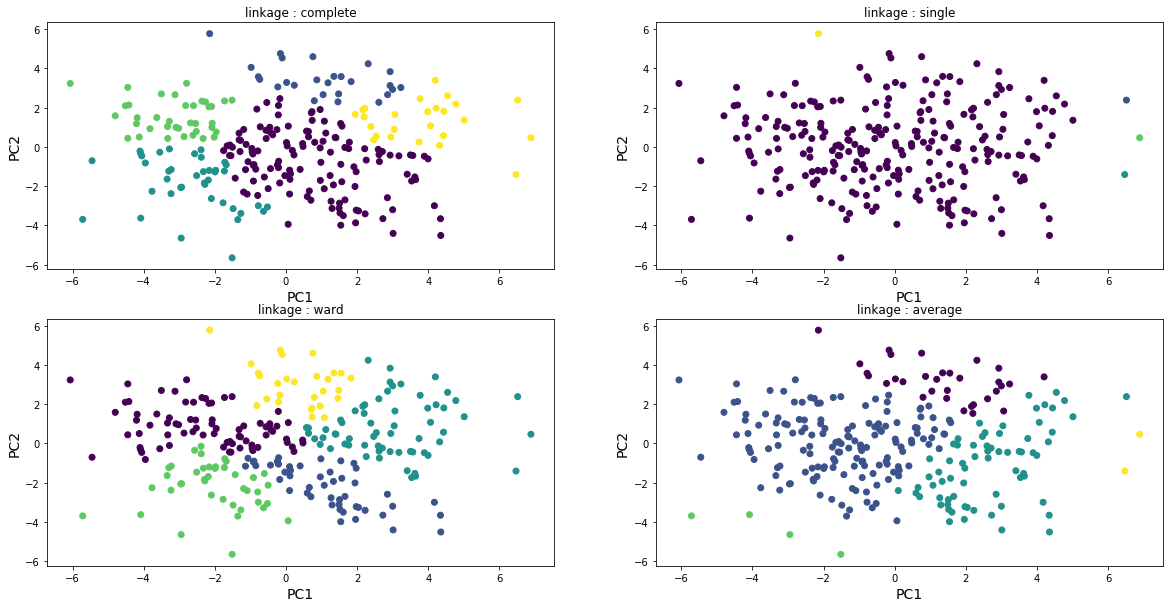

In [214]:
gs = GridSpec(2,2)

plt.figure(figsize=(20, 10))

plt.subplot(gs[0, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_k5.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('linkage : complete')

plt.subplot(gs[0, 1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_1.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('linkage : single')

plt.subplot(gs[1, 0])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_2.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('linkage : ward')

plt.subplot(gs[1,1])
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=agg_3.labels_)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title('linkage : average')

plt.show()